In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import spacy

In [ ]:
df = pd.read_excel("/content/sentiment_classified.xlsx")

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,i wanna die i wanna die i wanna die i wanna di...,0.456349,0.029072,0.834870
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,why do i have to deal with this shit at 16 i’v...,0.020873,0.007796,0.452833
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,everytime i see an attractive person i get pis...,0.001276,0.001461,0.395856


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           12986 non-null  object 
 1   post_text       12986 non-null  object 
 2   subreddit       12986 non-null  object 
 3   post_time       12986 non-null  object 
 4   upvotes         12986 non-null  int64  
 5   num_comments    12986 non-null  int64  
 6   combined_text   12986 non-null  object 
 7   Positive_Score  12986 non-null  float64
 8   Neutral_Score   12986 non-null  float64
 9   Negative_Score  12986 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1014.7+ KB


In [ ]:
df.isna().sum()

,0
title,0
post_text,0
subreddit,0
post_time,0
upvotes,0
num_comments,0
combined_text,0
Positive_Score,0
Neutral_Score,0
Negative_Score,0


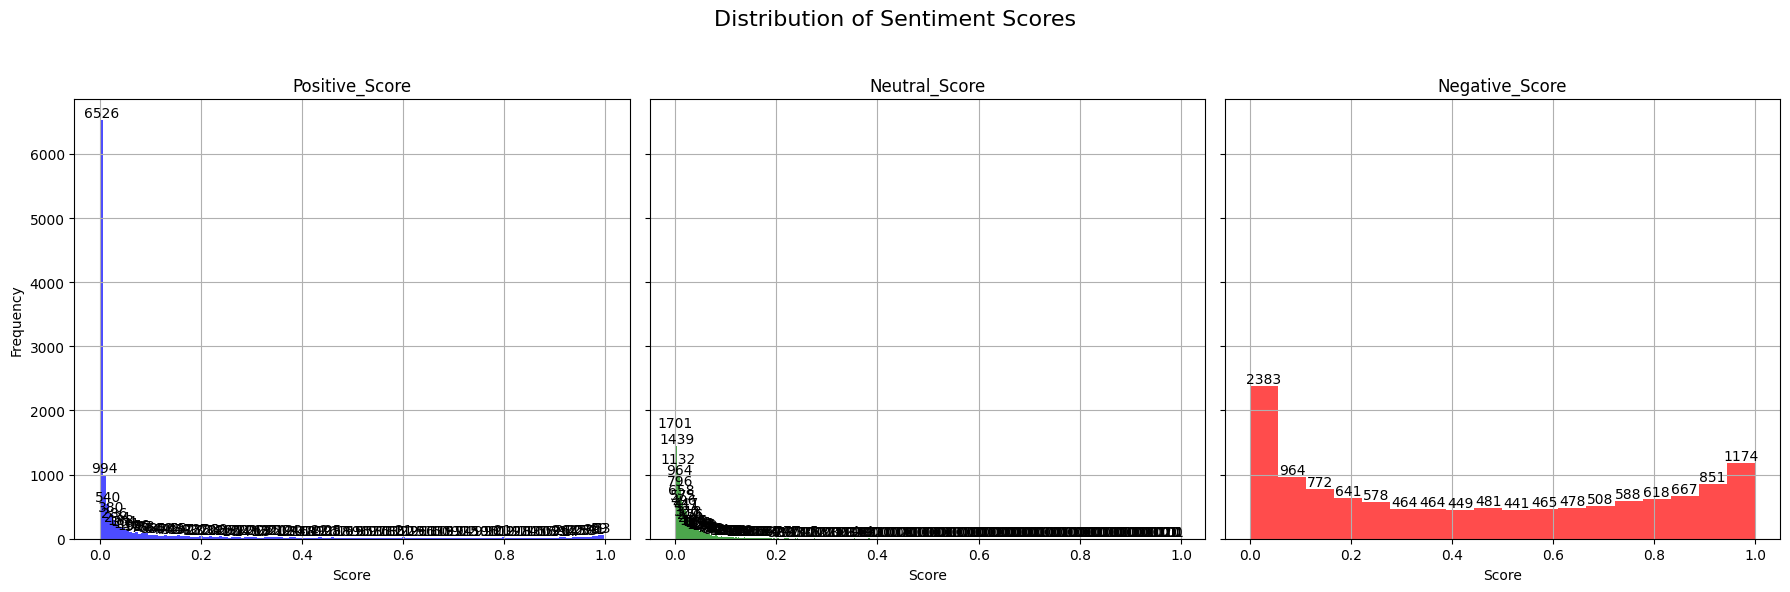

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Sentiment Scores', fontsize=16)

# Positive_Score
axs[0].hist(df['Positive_Score'], bins='auto', color='blue', alpha=0.7)
axs[0].set_title('Positive_Score')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Neutral_Score
axs[1].hist(df['Neutral_Score'], bins='auto', color='green', alpha=0.7)
axs[1].set_title('Neutral_Score')
axs[1].set_xlabel('Score')
axs[1].grid(True)

# Negative_Score
axs[2].hist(df['Negative_Score'], bins='auto', color='red', alpha=0.7)
axs[2].set_title('Negative_Score')
axs[2].set_xlabel('Score')
axs[2].grid(True)

# Add data labels
for ax in axs:
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# df.dropna(subset=['title'], inplace=True)
# df.dropna(subset=['post_text'], inplace=True)

In [ ]:
# df.info()

### Word Cloud

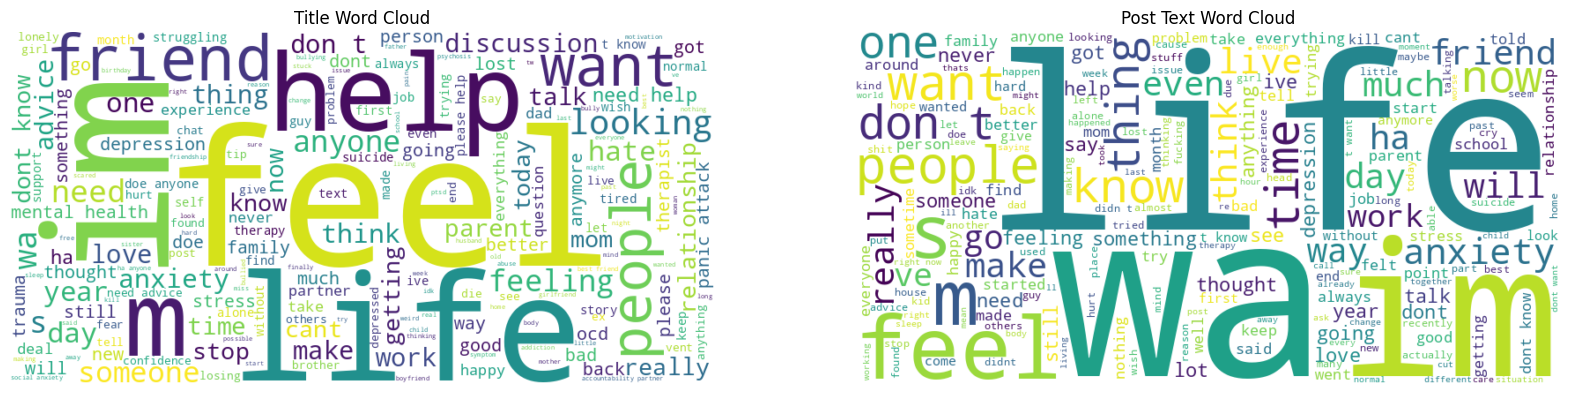

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def display_wordclouds(text_series1, title1, text_series2, title2):
    text1 = ' '.join(text_series1)  # Combine all text in the first series into a single string
    wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1)

    text2 = ' '.join(text_series2)  # Combine all text in the second series into a single string
    wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # First word cloud
    axes[0].imshow(wordcloud1, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title(title1)

    # Second word cloud
    axes[1].imshow(wordcloud2, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title(title2)

    plt.show()

display_wordclouds(df['title'], 'Title Word Cloud', df['post_text'], 'Post Text Word Cloud')

### Tokenization

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_columns(df, columns_to_tokenize):
    for column in columns_to_tokenize:
        if column in df.columns:
            # Create a new column name for the tokenized data
            new_column_name = f"tokenized_{column}"
            # Tokenize each entry in the column and store it in the new column
            df[new_column_name] = df[column].apply(lambda x: word_tokenize(str(x)))
        else:
            print(f"Column '{column}' not found in DataFrame.")
    return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = tokenize_columns(df, ['title', 'post_text'])

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score,tokenized_title,tokenized_post_text
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707,"[our, mostbroken, and, leastunderstood, rule, ...","[it, will, be, maintained, at, rdepressionwiki..."
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613,"[regular, checkin, post, with, information, ab...","[welcome, to, rdepressions, checkin, post, a, ..."
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,i wanna die i wanna die i wanna die i wanna di...,0.456349,0.029072,0.834870,"[i, wan, na, die, i, wan, na, die, i, wan, na,...","[i, wan, na, die, i, wan, na, die, i, wan, na,..."
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,why do i have to deal with this shit at 16 i’v...,0.020873,0.007796,0.452833,"[why, do, i, have, to, deal, with, this, shit,...","[i, ’, ve, been, seeing, a, therapist, now, fo..."
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,everytime i see an attractive person i get pis...,0.001276,0.001461,0.395856,"[everytime, i, see, an, attractive, person, i,...","[is, there, something, wrong, with, me, or, is..."


Cognitive Load: **Sentence length** can indicate cognitive load or mental strain. For instance, short and fragmented sentences might suggest confusion or distress, while longer sentences could indicate a more reflective or obsessive state.

Emotional State: **Complexity in sentence structure** might reflect emotional complexity. Simple sentences might suggest straightforward thinking, while complex sentences could indicate overthinking or emotional turbulence.

### Sentence Length

In [ ]:
def average_sentence_length(tokens_list):
    lengths = [len(tokens) for tokens in tokens_list]
    avg_length = np.mean(lengths) if lengths else np.nan
    return int(round(avg_length)) if not np.isnan(avg_length) else np.nan

In [ ]:
df['title_length'] = df['tokenized_title'].apply(average_sentence_length)
df['post_text_length'] = df['tokenized_post_text'].apply(average_sentence_length)

In [ ]:
# df.drop('title_length', axis=1, inplace=True)
# df.drop('post_text_length', axis=1, inplace=True)

In [ ]:
df.head(2)

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score,tokenized_title,tokenized_post_text,title_length,post_text_length
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707,"[our, mostbroken, and, leastunderstood, rule, ...","[it, will, be, maintained, at, rdepressionwiki...",4,5
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613,"[regular, checkin, post, with, information, ab...","[welcome, to, rdepressions, checkin, post, a, ...",5,6


### Sentence Complexity

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00


In [ ]:
import textstat
def readability_score(tokens_list):
    text = ' '.join([' '.join(tokens) for tokens in tokens_list])
    return textstat.flesch_kincaid_grade(text)

In [ ]:
# Readability score for each column
df['title_readability'] = df['title'].apply(readability_score)
df['post_text_readability'] = df['post_text'].apply(readability_score)

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score,tokenized_title,tokenized_post_text,title_length,post_text_length,title_readability,post_text_readability
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707,"[our, mostbroken, and, leastunderstood, rule, ...","[it, will, be, maintained, at, rdepressionwiki...",4,5,39.5,214.2
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613,"[regular, checkin, post, with, information, ab...","[welcome, to, rdepressions, checkin, post, a, ...",5,6,16.9,361.6
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,i wanna die i wanna die i wanna die i wanna di...,0.456349,0.029072,0.834870,"[i, wan, na, die, i, wan, na, die, i, wan, na,...","[i, wan, na, die, i, wan, na, die, i, wan, na,...",2,2,45.3,45.3
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,why do i have to deal with this shit at 16 i’v...,0.020873,0.007796,0.452833,"[why, do, i, have, to, deal, with, this, shit,...","[i, ’, ve, been, seeing, a, therapist, now, fo...",3,4,8.7,166.6
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,everytime i see an attractive person i get pis...,0.001276,0.001461,0.395856,"[everytime, i, see, an, attractive, person, i,...","[is, there, something, wrong, with, me, or, is...",4,4,19.2,44.2


### Sentiment Analysis

In [ ]:
# from transformers import pipeline

# model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
# sentiment_pipeline = pipeline('sentiment-analysis', model=model_name)

# MAX_SEQ_LEN = 512

# def get_sentiment(text):
#     if text is None or not isinstance(text, str) or text.strip() == "":
#         return None
#     # Truncate the text to the maximum sequence length
#     truncated_text = text[:MAX_SEQ_LEN]
#     result = sentiment_pipeline(truncated_text)[0]
#     return result['label'], result['score']

In [ ]:
# df['combined_text'] = df['title'] + ' ' + df['post_text']

In [ ]:
# df[['label', 'sentiment_score']] = df['combined_text'].apply(lambda x: pd.Series(get_sentiment(x)))

In [ ]:
# df.drop('combined_text',axis=1, inplace= True)

In [ ]:
# df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,labels,label,sentiment_score,title_lexical_diversity,post_text_lexical_diversity,post_text_keywords,title_keywords,post_text_negations,title_negations,post_text_emotional_tone,title_emotional_tone,tokenized_title,tokenized_post_text
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,negative,NEGATIVE,0.999552,0.920000,0.714286,[],[],[],"[not, no]","{'neg': 0.064, 'neu': 0.824, 'pos': 0.113, 'co...","{'neg': 0.061, 'neu': 0.839, 'pos': 0.101, 'co...","[[, 'our, ', ,, 'mostbroken, ', ,, 'and, ', ,,...","[it, will, be, maintained, at, rdepressionwiki..."
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,negative,NEGATIVE,0.985773,1.000000,0.600000,[],[],[no],[],"{'neg': 0.053, 'neu': 0.825, 'pos': 0.122, 'co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","[[, 'regular, ', ,, 'checkin, ', ,, 'post, ', ...","[welcome, to, rdepressions, checkin, post, a, ..."
2,i wan na die i wan na die i wan na die i wan n...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,negative,NEGATIVE,0.956872,0.071429,0.071429,[],[],[],[],"{'neg': 0.796, 'neu': 0.204, 'pos': 0.0, 'comp...","{'neg': 0.796, 'neu': 0.204, 'pos': 0.0, 'comp...","[[, ', i, ', ,, 'wan, ', ,, 'na, ', ,, 'die, '...","[i, wan, na, die, i, wan, na, die, i, wan, na,..."
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,negative,NEGATIVE,0.993248,1.000000,0.728070,[],[],[no],[],"{'neg': 0.092, 'neu': 0.735, 'pos': 0.173, 'co...","{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...","[[, 'why, ', ,, 'do, ', ,, ', i, ', ,, 'have, ...","[i, ’, ve, been, seeing, a, therapist, now, fo..."
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,negative,NEGATIVE,0.996285,0.928571,0.964286,[],[],[no],[],"{'neg': 0.097, 'neu': 0.786, 'pos': 0.116, 'co...","{'neg': 0.368, 'neu': 0.377, 'pos': 0.255, 'co...","[[, 'everytime, ', ,, ', i, ', ,, 'see, ', ,, ...","[is, there, something, wrong, with, me, or, is..."


### POST

In [ ]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score,tokenized_title,tokenized_post_text,title_length,post_text_length,title_readability,post_text_readability
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707,"[our, mostbroken, and, leastunderstood, rule, ...","[it, will, be, maintained, at, rdepressionwiki...",4,5,39.5,214.2
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613,"[regular, checkin, post, with, information, ab...","[welcome, to, rdepressions, checkin, post, a, ...",5,6,16.9,361.6
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,i wanna die i wanna die i wanna die i wanna di...,0.456349,0.029072,0.834870,"[i, wan, na, die, i, wan, na, die, i, wan, na,...","[i, wan, na, die, i, wan, na, die, i, wan, na,...",2,2,45.3,45.3
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,why do i have to deal with this shit at 16 i’v...,0.020873,0.007796,0.452833,"[why, do, i, have, to, deal, with, this, shit,...","[i, ’, ve, been, seeing, a, therapist, now, fo...",3,4,8.7,166.6
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,everytime i see an attractive person i get pis...,0.001276,0.001461,0.395856,"[everytime, i, see, an, attractive, person, i,...","[is, there, something, wrong, with, me, or, is...",4,4,19.2,44.2


In [ ]:
df['title_POS'] = df['tokenized_title'].apply(nltk.pos_tag)
df['post_text_POS'] = df['tokenized_post_text'].apply(nltk.pos_tag)

### Lexical diversity
is a measure of how varied the vocabulary is within a given text. Higher lexical diversity indicates a greater variety of unique words, while lower diversity suggests more repetition.

Commonly measured as:

**Type-Token Ratio (TTR**): The number of unique words (types) divided by the total number of words (tokens).

**Vocabulary Density**: The number of unique words divided by the number of total words in a text.

In [ ]:
from collections import Counter
def lexical_diversity(text):
    tokens = text.split()  # Tokenize the text (split by whitespace)
    num_tokens = len(tokens)  # Count unique words
    num_unique_tokens = len(set(tokens))
    #Type-Token Ratio:
    ttr = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    return ttr

In [ ]:
df['title_lexical_diversity'] = df['title'].apply(lexical_diversity)
df['post_text_lexical_diversity'] = df['post_text'].apply(lexical_diversity)

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score,tokenized_title,tokenized_post_text,title_length,post_text_length,title_readability,post_text_readability,title_POS,post_text_POS,title_lexical_diversity,post_text_lexical_diversity
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707,"[our, mostbroken, and, leastunderstood, rule, ...","[it, will, be, maintained, at, rdepressionwiki...",4,5,39.5,214.2,"[(our, PRP$), (mostbroken, NN), (and, CC), (le...","[(it, PRP), (will, MD), (be, VB), (maintained,...",0.920000,0.714286
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613,"[regular, checkin, post, with, information, ab...","[welcome, to, rdepressions, checkin, post, a, ...",5,6,16.9,361.6,"[(regular, JJ), (checkin, NN), (post, NN), (wi...","[(welcome, NN), (to, TO), (rdepressions, NNS),...",1.000000,0.600000
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,i wanna die i wanna die i wanna die i wanna di...,0.456349,0.029072,0.834870,"[i, wan, na, die, i, wan, na, die, i, wan, na,...","[i, wan, na, die, i, wan, na, die, i, wan, na,...",2,2,45.3,45.3,"[(i, NN), (wan, VBP), (na, TO), (die, VB), (i,...","[(i, NN), (wan, VBP), (na, TO), (die, VB), (i,...",0.071429,0.071429
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,why do i have to deal with this shit at 16 i’v...,0.020873,0.007796,0.452833,"[why, do, i, have, to, deal, with, this, shit,...","[i, ’, ve, been, seeing, a, therapist, now, fo...",3,4,8.7,166.6,"[(why, WRB), (do, VBP), (i, RB), (have, VBP), ...","[(i, NN), (’, VBP), (ve, RB), (been, VBN), (se...",1.000000,0.728070
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,everytime i see an attractive person i get pis...,0.001276,0.001461,0.395856,"[everytime, i, see, an, attractive, person, i,...","[is, there, something, wrong, with, me, or, is...",4,4,19.2,44.2,"[(everytime, NN), (i, NN), (see, VBP), (an, DT...","[(is, VBZ), (there, EX), (something, NN), (wro...",0.928571,0.964286


### GloVe

In [ ]:
# !unzip "/content/drive/MyDrive/glove.twitter.27B.zip"

Archive:  /content/drive/MyDrive/glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [ ]:
def load_glove_embeddings(filepath):
    embeddings_index = {}
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Loaded {len(embeddings_index)} word vectors.")
    return embeddings_index

In [ ]:
glove_path = '/content/drive/MyDrive/glove.twitter.27B.200d.txt'
embeddings_index = load_glove_embeddings(glove_path)

Loaded 1193514 word vectors.


Using `GloVe`

In [ ]:
def get_average_word_vectors(tokens, embeddings_index):
    valid_vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
    if not valid_vectors:
        return np.zeros(200)  # Returns a zero vector if none of the words are in the embedding index
    return np.mean(valid_vectors, axis=0)

In [ ]:
df['title_avg_vector'] = df['tokenized_title'].apply(lambda tokens: get_average_word_vectors(tokens, embeddings_index))
df['post_text_avg_vector'] = df['tokenized_post_text'].apply(lambda tokens: get_average_word_vectors(tokens, embeddings_index))

In [ ]:
df.columns

Index(['title', 'post_text', 'subreddit', 'post_time', 'upvotes',
       'num_comments', 'combined_text', 'Positive_Score', 'Neutral_Score',
       'Negative_Score', 'tokenized_title', 'tokenized_post_text',
       'title_length', 'post_text_length', 'title_readability',
       'post_text_readability', 'title_POS', 'post_text_POS',
       'title_lexical_diversity', 'post_text_lexical_diversity',
       'title_avg_vector', 'post_text_avg_vector'],
      dtype='object')

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score,...,title_length,post_text_length,title_readability,post_text_readability,title_POS,post_text_POS,title_lexical_diversity,post_text_lexical_diversity,title_avg_vector,post_text_avg_vector
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707,...,4,5,39.5,214.2,"[(our, PRP$), (mostbroken, NN), (and, CC), (le...","[(it, PRP), (will, MD), (be, VB), (maintained,...",0.920000,0.714286,"[0.11214177, 0.19449903, -0.031419877, 0.18901...","[0.10150365, 0.18343511, 0.07159131, 0.1280618..."
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613,...,5,6,16.9,361.6,"[(regular, JJ), (checkin, NN), (post, NN), (wi...","[(welcome, NN), (to, TO), (rdepressions, NNS),...",1.000000,0.600000,"[-0.0785228, 0.1369991, -0.07422951, -0.037754...","[0.117884114, 0.14532687, 0.017566701, 0.08738..."
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,i wanna die i wanna die i wanna die i wanna di...,0.456349,0.029072,0.834870,...,2,2,45.3,45.3,"[(i, NN), (wan, VBP), (na, TO), (die, VB), (i,...","[(i, NN), (wan, VBP), (na, TO), (die, VB), (i,...",0.071429,0.071429,"[0.069943, 0.28380263, 0.158605, -0.050937988,...","[0.069943, 0.28380263, 0.158605, -0.050937988,..."
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,why do i have to deal with this shit at 16 i’v...,0.020873,0.007796,0.452833,...,3,4,8.7,166.6,"[(why, WRB), (do, VBP), (i, RB), (have, VBP), ...","[(i, NN), (’, VBP), (ve, RB), (been, VBN), (se...",1.000000,0.728070,"[0.04813779, 0.25431916, 0.15629148, 0.170658,...","[0.0878198, 0.165177, 0.017506737, 0.054647222..."
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,everytime i see an attractive person i get pis...,0.001276,0.001461,0.395856,...,4,4,19.2,44.2,"[(everytime, NN), (i, NN), (see, VBP), (an, DT...","[(is, VBZ), (there, EX), (something, NN), (wro...",0.928571,0.964286,"[-0.014954795, 0.16240999, -0.010594643, 0.081...","[0.009219376, 0.32407948, 0.013387752, 0.10902..."


### NER - Named Entity Relationship

Usage:
You can use `[post_text_entities]` and `[title_entities]` columns to:

Understand the types of entities mentioned in the text.

Provide personalized responses: Use the identified entities to tailor responses or recommendations.

Extract actionable insights: Identify key entities like locations or organizations to provide relevant support or resource

In [ ]:
# sampled_df = df.sample(n=50, random_state=42)
# sampled_df.reset_index(drop=True, inplace=True)

In [ ]:
from transformers import pipeline

ner_model_name = 'dbmdz/bert-large-cased-finetuned-conll03-english'
ner_pipeline = pipeline('ner', model=ner_model_name, aggregation_strategy="simple", device=0)#0 for GPU or -1 for CPU.

MAX_SEQ_LEN = 512

def get_entities(text, embedding):
    if text is None or not isinstance(text, str) or text.strip() == "":
        return []
    truncated_text = text[:MAX_SEQ_LEN]     # Truncate the text to the maximum sequence length
    entities = ner_pipeline(truncated_text)
    return [(entity['entity_group'], entity['word']) for entity in entities]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# sampled_df['post_text_entities'] = sampled_df.apply(lambda row: get_entities(row['post_text'], row['post_text_avg_vector']), axis=1)
# sampled_df['title_entities'] = sampled_df.apply(lambda row: get_entities(row['title'], row['title_avg_vector']), axis=1)


In [ ]:
df.columns

Index(['title', 'post_text', 'subreddit', 'post_time', 'upvotes',
       'num_comments', 'combined_text', 'Positive_Score', 'Neutral_Score',
       'Negative_Score', 'tokenized_title', 'tokenized_post_text',
       'title_length', 'post_text_length', 'title_readability',
       'post_text_readability', 'title_POS', 'post_text_POS',
       'title_lexical_diversity', 'post_text_lexical_diversity',
       'title_avg_vector', 'post_text_avg_vector'],
      dtype='object')

### Specific Keywords

In [ ]:
# @title Specific Keywords List
specific_keywords = [ "I can't take it anymore",
    "nobody understands",
    "end it all",
    "I feel so alone",
    "I'm worthless",
    "I hate myself",
    "life is pointless",
    "I can't go on like this",
    "I'm a burden",
    "no one cares about me",
    "I wish I could disappear",
    "I'm so tired of everything",
    "I don't belong here",
    "why does it hurt so much?",
    "I can't find any reason to live",
    "I'm trapped in my own mind",
    "the pain is unbearable",
    "I don't want to wake up tomorrow",
    "everything feels empty",
    "I'm just so tired of fighting",
    "I can't escape my thoughts",
    "I'm constantly hurting",
    "no one will miss me",
    "I feel invisible",
    "nothing ever gets better",
    "why should I even try?",
    "I'm drowning in sadness",
    "I wish I were dead",
    "I'm too broken to be fixed",
    "they won't care if I'm gone",
    "I'm just a mistake",
    "it's all my fault",
    "I don't deserve happiness",
    "I wish I could be someone else",
    "everything I do is wrong",
    "no one understands my pain",
    "I just want the pain to stop",
    "why can't I be normal?",
    "I feel like I'm losing my mind",  "no one would notice if I were gone"
]


In [ ]:
def detect_keywords(text):
    if text is None or not isinstance(text, str) or text.strip() == "":
        return []
    detected_keywords = [keyword for keyword in specific_keywords if keyword in text]
    return detected_keywords

In [ ]:
df['post_text_keywords'] = df['post_text'].apply(lambda x: detect_keywords(x))
df['title_keywords'] = df['title'].apply(lambda x: detect_keywords(x))

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,labels,label,sentiment_score,title_lexical_diversity,post_text_lexical_diversity,post_text_keywords,title_keywords
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,negative,NEGATIVE,0.999552,0.920000,0.714286,[],[]
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,negative,NEGATIVE,0.985773,1.000000,0.600000,[],[]
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,negative,NEGATIVE,0.956872,0.071429,0.071429,[],[]
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,negative,NEGATIVE,0.993248,1.000000,0.728070,[],[]
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,negative,NEGATIVE,0.996285,0.928571,0.964286,[],[]


In [ ]:
df.columns

Index(['title', 'post_text', 'subreddit', 'post_time', 'upvotes',
       'num_comments', 'combined_text', 'Positive_Score', 'Neutral_Score',
       'Negative_Score', 'tokenized_title', 'tokenized_post_text',
       'title_length', 'post_text_length', 'title_readability',
       'post_text_readability', 'title_POS', 'post_text_POS',
       'title_lexical_diversity', 'post_text_lexical_diversity',
       'title_avg_vector', 'post_text_avg_vector'],
      dtype='object')

### Detect Negations

In [ ]:
negations = ["not", "never", "no", "none", "nobody", "nothing", "neither", "nowhere", "can't", "don't", "won't", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't", "hadn't", "doesn't", "didn't", "wouldn't", "shouldn't", "couldn't", "mightn't", "mustn't", "ain't"]

In [ ]:
# Define the function to detect negations
def detect_negations(text):
    if text is None or not isinstance(text, str) or text.strip() == "":
        return []
    detected_negations = [negation for negation in negations if negation in text]
    return detected_negations

In [ ]:
df['post_text_negations'] = df['post_text'].apply(lambda x: detect_negations(x))
df['title_negations'] = df['title'].apply(lambda x: detect_negations(x))

### Assess Emotional Tone

In [ ]:


def check_severity(text, embedding):
    if text is None or not isinstance(text, str) or text.strip() == "":
        return "Low"  # Default to Low if text is empty or invalid
    # Perform sentiment analysis
    result = sentiment_pipeline(text)
    sentiment_score = result[0]['score']
    sentiment_label = result[0]['label']

    # Map sentiment scores to emotional distress levels
    if sentiment_label == 'NEGATIVE':
        if sentiment_score > 0.75:
            return "High"
        elif sentiment_score > 0.5:
            return "Moderate"
        else:
            return "Low"
    else:
        return "Low"

In [ ]:
sampled_df['post_text_emotional_tone'] = sampled_df.apply(lambda row: assess_emotional_tone(row['post_text'], row['post_text_avg_vector']), axis=1)
sampled_df['title_emotional_tone'] = sampled_df.apply(lambda row: assess_emotional_tone(row['title'], row['title_avg_vector']), axis=1)

In [ ]:
sampled_df['post_text_severity'] = sampled_df.apply(lambda row: check_severity(row['post_text'], row['post_text_avg_vector']), axis=1)
sampled_df['title_severity'] = sampled_df.apply(lambda row: check_severity(row['title'], row['title_avg_vector']), axis=1)

In [ ]:
# # Combine the severity levels into a single column
# df['severity'] = df.apply(lambda row: max(row['post_text_severity'], row['title_severity'], key=lambda x: ['Low', 'Moderate', 'High'].index(x)), axis=1)


In [ ]:
# df['post_text_emotional_tone'] = df.apply(lambda row: assess_emotional_tone(row['post_text'], row['post_text_avg_vector']), axis=1)
# df['title_emotional_tone'] = df.apply(lambda row: assess_emotional_tone(row['title'], row['title_avg_vector']), axis=1)


check labelling tools

pick bert between roberta based on performance

google metrics for testing performance

### Creating Target Labels

#### Classify Urgency

In [ ]:
def classify_urgency(positive, neutral, negative):
    if negative > 0.67:
        return 'immediate'
    elif 0.33 < negative <= 0.67:
        return 'urgent'
    else:
        return 'non-urgent'

In [ ]:
df['urgency'] = df.apply(lambda row: classify_urgency(row['Positive_Score'], row['Neutral_Score'], row['Negative_Score']), axis=1)

#### Detect Distress Level

In [ ]:
def classify_distress(positive, neutral, negative):
    if negative > 0.67:
        return 'high'
    elif 0.33 < negative <= 0.67:
        return 'moderate'
    else:
        return 'low'

In [ ]:
df['distress_level'] = df.apply(lambda row: classify_distress(row['Positive_Score'], row['Neutral_Score'], row['Negative_Score']), axis=1)

#### Create Label Column

In [ ]:
def determine_overall_sentiment(positive, neutral, negative):
    if positive > max(neutral, negative):
        return 'positive'
    elif negative > max(positive, neutral):
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['label'] = df.apply(lambda row: determine_overall_sentiment(row['Positive_Score'], row['Neutral_Score'], row['Negative_Score']), axis=1)

In [ ]:
df.head()

,title,post_text,subreddit,post_time,upvotes,num_comments,combined_text,Positive_Score,Neutral_Score,Negative_Score,...,post_text_readability,title_POS,post_text_POS,title_lexical_diversity,post_text_lexical_diversity,title_avg_vector,post_text_avg_vector,urgency,distress_level,label
0,our mostbroken and leastunderstood rule is hel...,it will be maintained at rdepressionwikiprivat...,depression,2019-10-29T19:52:02,2365,177,our mostbroken and leastunderstood rule is hel...,0.034309,0.169319,0.783707,...,214.2,"[(our, PRP$), (mostbroken, NN), (and, CC), (le...","[(it, PRP), (will, MD), (be, VB), (maintained,...",0.920000,0.714286,"[0.11214177, 0.19449903, -0.031419877, 0.18901...","[0.10150365, 0.18343511, 0.07159131, 0.1280618...",immediate,high,negative
1,regular checkin post with information about ou...,welcome to rdepressions checkin post a place t...,depression,2024-03-29T04:15:19,59,179,regular checkin post with information about ou...,0.133493,0.139771,0.475613,...,361.6,"[(regular, JJ), (checkin, NN), (post, NN), (wi...","[(welcome, NN), (to, TO), (rdepressions, NNS),...",1.000000,0.600000,"[-0.0785228, 0.1369991, -0.07422951, -0.037754...","[0.117884114, 0.14532687, 0.017566701, 0.08738...",urgent,moderate,negative
2,i wanna die i wanna die i wanna die i wanna di...,i wanna die i wanna die i wanna die i wanna di...,depression,2024-08-09T20:42:53,71,45,i wanna die i wanna die i wanna die i wanna di...,0.456349,0.029072,0.834870,...,45.3,"[(i, NN), (wan, VBP), (na, TO), (die, VB), (i,...","[(i, NN), (wan, VBP), (na, TO), (die, VB), (i,...",0.071429,0.071429,"[0.069943, 0.28380263, 0.158605, -0.050937988,...","[0.069943, 0.28380263, 0.158605, -0.050937988,...",immediate,high,negative
3,why do i have to deal with this shit at 16,i’ve been seeing a therapist now for a month o...,depression,2024-08-09T21:16:30,35,22,why do i have to deal with this shit at 16 i’v...,0.020873,0.007796,0.452833,...,166.6,"[(why, WRB), (do, VBP), (i, RB), (have, VBP), ...","[(i, NN), (’, VBP), (ve, RB), (been, VBN), (se...",1.000000,0.728070,"[0.04813779, 0.25431916, 0.15629148, 0.170658,...","[0.0878198, 0.165177, 0.017506737, 0.054647222...",urgent,moderate,negative
4,everytime i see an attractive person i get pis...,is there something wrong with me or is this no...,depression,2024-08-09T19:05:47,23,10,everytime i see an attractive person i get pis...,0.001276,0.001461,0.395856,...,44.2,"[(everytime, NN), (i, NN), (see, VBP), (an, DT...","[(is, VBZ), (there, EX), (something, NN), (wro...",0.928571,0.964286,"[-0.014954795, 0.16240999, -0.010594643, 0.081...","[0.009219376, 0.32407948, 0.013387752, 0.10902...",urgent,moderate,negative


In [ ]:
df.columns

Index(['title', 'post_text', 'subreddit', 'post_time', 'upvotes',
       'num_comments', 'combined_text', 'Positive_Score', 'Neutral_Score',
       'Negative_Score', 'tokenized_title', 'tokenized_post_text',
       'title_length', 'post_text_length', 'title_readability',
       'post_text_readability', 'title_POS', 'post_text_POS',
       'title_lexical_diversity', 'post_text_lexical_diversity',
       'title_avg_vector', 'post_text_avg_vector', 'urgency', 'distress_level',
       'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        12986 non-null  object 
 1   post_text                    12986 non-null  object 
 2   subreddit                    12986 non-null  object 
 3   post_time                    12986 non-null  object 
 4   upvotes                      12986 non-null  int64  
 5   num_comments                 12986 non-null  int64  
 6   combined_text                12986 non-null  object 
 7   Positive_Score               12986 non-null  float64
 8   Neutral_Score                12986 non-null  float64
 9   Negative_Score               12986 non-null  float64
 10  tokenized_title              12986 non-null  object 
 11  tokenized_post_text          12986 non-null  object 
 12  title_length                 12986 non-null  int64  
 13  post_text_length

In [ ]:
df.to_excel("All-you-need-dataset.xlsx", index=False)